# فراخانی کتابخانه ها

In [10]:
import numpy as np
import tensorflow as tf
from keras.datasets import cifar100
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

# بارگذاری دیتاست

In [11]:
(x_train_full, y_train_full), (x_test, y_test) = cifar100.load_data(label_mode='fine')

In [12]:
y_train_full = to_categorical(y_train_full, 100)
y_test = to_categorical(y_test, 100)

# تقسیم داده آموزش و اعتبار سنجی

In [13]:
x_train, x_val, y_train, y_val = train_test_split(
    x_train_full, y_train_full, test_size=0.25, random_state=42)

# نرمال سازی

In [ ]:
x_train = x_train / 255.0
x_val = x_val / 255.0
x_test = x_test / 255.0

# ساخت مدل

In [15]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.layers import Dropout, BatchNormalization
from keras.regularizers import l1_l2


In [16]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3),  strides=1, padding='same', activation='relu',
                  kernel_regularizer=l1_l2(l1=0.001, l2=0.01), input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Dropout(0.2))


model.add(Conv2D(filters=64, kernel_size=(3, 3),  strides=2, padding='same', activation='relu',
                  kernel_regularizer=l1_l2(l1=0.001, l2=0.01)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=128, kernel_size=(3, 3),  strides=2, padding='same', activation='relu',
                  kernel_regularizer=l1_l2(l1=0.001, l2=0.01)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense (units=256, activation='relu', kernel_regularizer=l1_l2(l1=0.001, l2=0.01)))
model.add(Dropout(0.2))

model.add(Dense(units=100, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 64)          18496     
                                                                 
 batch_normalization_1 (Batc  (None, 8, 8, 64)         2

# آموزش مدل

In [17]:
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [18]:
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss = 'categorical_crossentropy',
    metrics=['accuracy']
)

early_stop = EarlyStopping(monitor='val_loss',
                           patience=10, restore_best_weights=True)
reduce_ir = ReduceLROnPlateau(monitor='val_loss',
                              patience=5, factor=0.5, min_lr=1e-6)

history = model.fit(
    x_train, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(x_val, y_val),
    callbacks=[early_stop, reduce_ir]
)

Epoch 1/50
1172/1172 [==============================] - 55s 46ms/step - loss: 6.1556 - accuracy: 0.0819 - val_loss: 4.8427 - val_accuracy: 0.1022 - lr: 0.0010
Epoch 2/50
1172/1172 [==============================] - 60s 51ms/step - loss: 4.6061 - accuracy: 0.1307 - val_loss: 5.2744 - val_accuracy: 0.0686 - lr: 0.0010
Epoch 3/50
1172/1172 [==============================] - 61s 52ms/step - loss: 4.5003 - accuracy: 0.1506 - val_loss: 4.4747 - val_accuracy: 0.1580 - lr: 0.0010
Epoch 4/50
1172/1172 [==============================] - 60s 51ms/step - loss: 4.4108 - accuracy: 0.1675 - val_loss: 4.4009 - val_accuracy: 0.1719 - lr: 0.0010
Epoch 5/50
1172/1172 [==============================] - 61s 52ms/step - loss: 4.3497 - accuracy: 0.1805 - val_loss: 4.7249 - val_accuracy: 0.1391 - lr: 0.0010
Epoch 6/50
1172/1172 [==============================] - 54s 46ms/step - loss: 4.2934 - accuracy: 0.1873 - val_loss: 4.1302 - val_accuracy: 0.2143 - lr: 0.0010
Epoch 7/50
1172/1172 [========================

# نمایش نمودار ها

In [5]:
import matplotlib.pyplot as plt

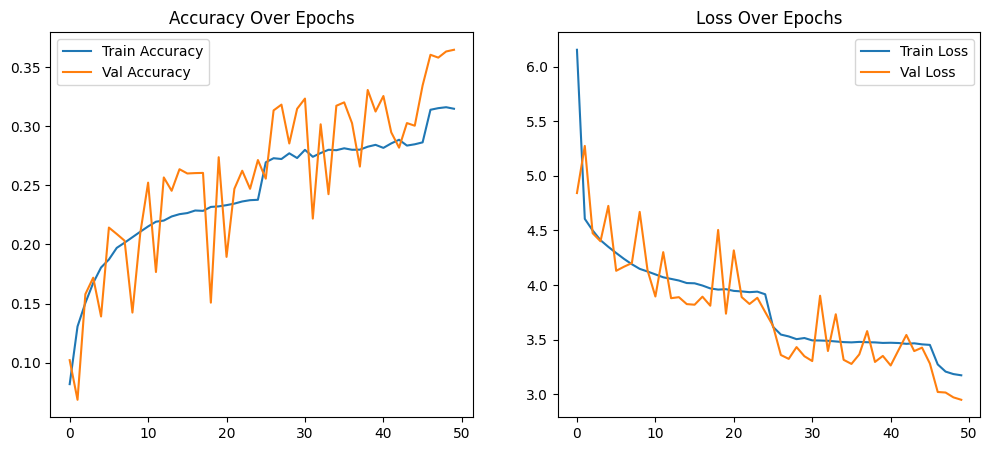

In [19]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'],
label='Train Accuracy')
plt.plot(history.history['val_accuracy'],
label='Val Accuracy')
plt.legend()
plt.title('Accuracy Over Epochs')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'],
label='Train Loss')
plt.plot(history.history['val_loss'],
label='Val Loss')
plt.legend()
plt.title('Loss Over Epochs')

plt.show()


In [20]:
import numpy as np
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix


In [21]:
y_pred = np.argmax(model.predict(x_test), axis=1)
y_true = np.argmax(y_test, axis=1)

313/313 [==============================] - 4s 13ms/step


# محاسبه معیارهای ارزیابی

In [22]:
report = classification_report(y_true, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.48      0.77      0.59       100
           1       0.44      0.30      0.36       100
           2       0.25      0.20      0.22       100
           3       0.22      0.14      0.17       100
           4       0.15      0.07      0.10       100
           5       0.24      0.28      0.26       100
           6       0.37      0.44      0.40       100
           7       0.47      0.25      0.33       100
           8       0.44      0.55      0.49       100
           9       0.43      0.60      0.50       100
          10       0.29      0.16      0.21       100
          11       0.35      0.08      0.13       100
          12       0.45      0.35      0.40       100
          13       0.41      0.33      0.36       100
          14       0.46      0.23      0.31       100
          15       0.24      0.11      0.15       100
          16       0.58      0.48      0.52       100
          17       0.48    

# ماتریس در هم ریختگی

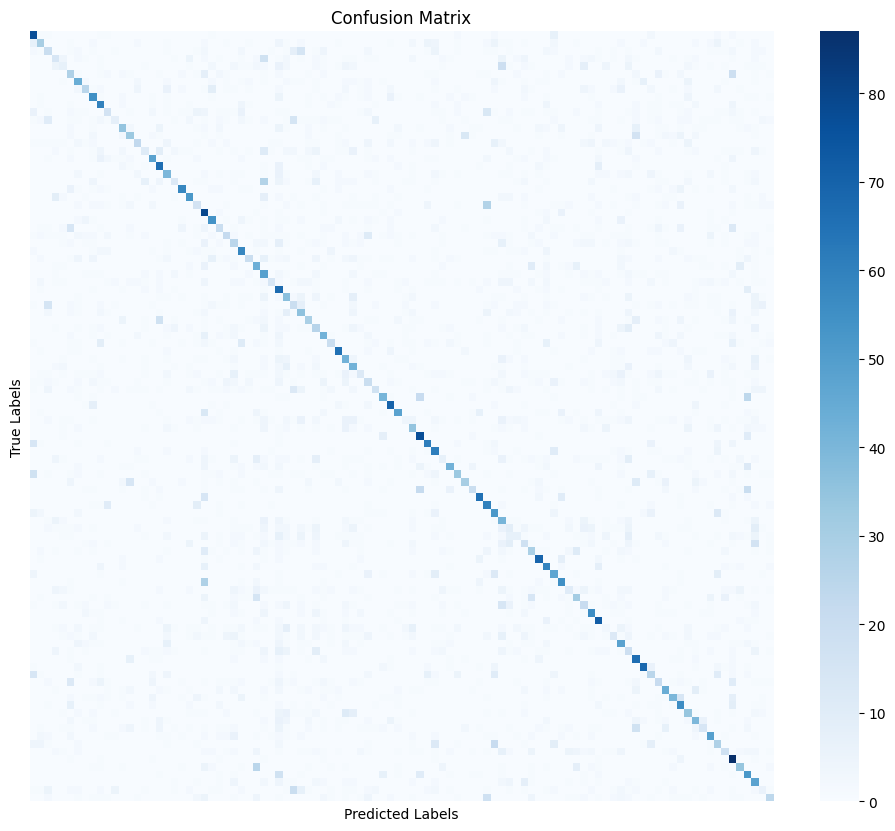

In [23]:
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, cmap='Blues',
            xticklabels=False, yticklabels=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# تحلیل کلاس های خوب و بد

In [24]:
from sklearn.metrics import precision_recall_fscore_support

precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average=None)

best_classes = np.argsort(f1)[-5:]
worst_classes = np.argsort(f1)[:5]

print("Best Performing class indices", best_classes)
print("worst Performing class indices", worst_classes)


Best Performing class indices [68 20 41 60 82]
worst Performing class indices [77 50 98  4 64]


# بارگذاری مدل پایه از پیش آموزش دیده
# ResNet 50

In [25]:
from keras.applications import ResNet50
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D, Dropout, Input

In [26]:
# ورودی جدید مناسب با داده های ما
input_tensor = Input(shape=(32, 32, 3))

In [41]:
#ResNet با وزن ImageNet
base_model = ResNet50(weights='imagenet', include_top=False, input_tensor=input_tensor)
# فریز کردن وزن ها
for layer in base_model.layers:
    layer.trainable = False

94765736/94765736 [==============================] - 400s 4us/step


# افزودن لایه های جدید برای طبقه بندی CIFAR-100

In [42]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
x = Dense(units=256, activation='relu')(x)
x = Dropout(0.3)(x)
output = Dense(units=100, activation='softmax')(x)
resnet_model = Model(inputs=base_model.input, outputs=output)

# کامپایل مدل

In [53]:
resnet_model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# آموزش مدل

In [75]:
renet_history = model.fit(
    x_train, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(x_val, y_val),
    callbacks=[early_stop, reduce_ir]
)

Epoch 1/50
1172/1172 [==============================] - ETA: 0s - loss: 2.5714 - accuracy: 0.3917

KeyboardInterrupt: 

# کد تحلیل خطا و نمایش تصاویر اشتباه

In [71]:
# پیش‌بینی نهایی با ResNet روی داده تست
y_pred_probs_resnet = resnet_model.predict(x_test)
y_pred_resnet = np.argmax(y_pred_probs_resnet, axis=1)
y_true_resnet = np.argmax(y_test, axis=1)

# پیدا کردن اندیس‌ نمونه‌هایی که به اشتباه طبقه‌بندی شدند
wrong_indices = np.where(y_pred_resnet != y_true_resnet)[0]

313/313 [==============================] - 30s 94ms/step


In [72]:
label_names = [
    'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle',
    'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle',
    'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur',
    'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard',
    'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain',
    'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree',
    'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket',
    'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider',
    'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor',
    'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm'
]


# نمایش 10 نمونه اشتباه

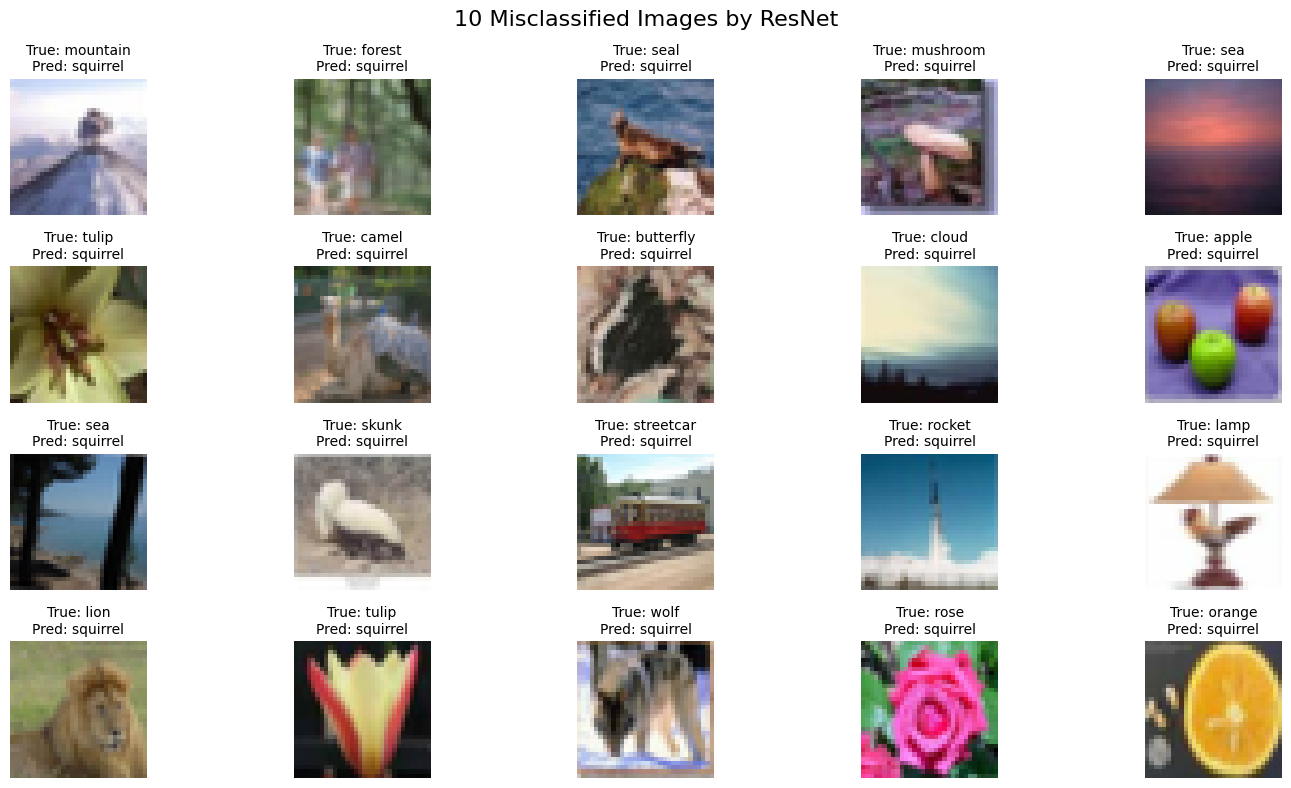

In [73]:
plt.figure(figsize=(15, 8))
for i, idx in enumerate(wrong_indices[:20]):
    true_label = label_names[y_true_resnet[idx]]
    pred_label = label_names[y_pred_resnet[idx]]
    plt.subplot(4, 5, i + 1)
    plt.imshow(x_test[idx])
    plt.axis('off')
    plt.title(f"True: {true_label}\nPred: {pred_label}", fontsize=10)
plt.suptitle("10 Misclassified Images by ResNet", fontsize=16)
plt.tight_layout()
plt.show()

# مقایسه CNN و ResNet

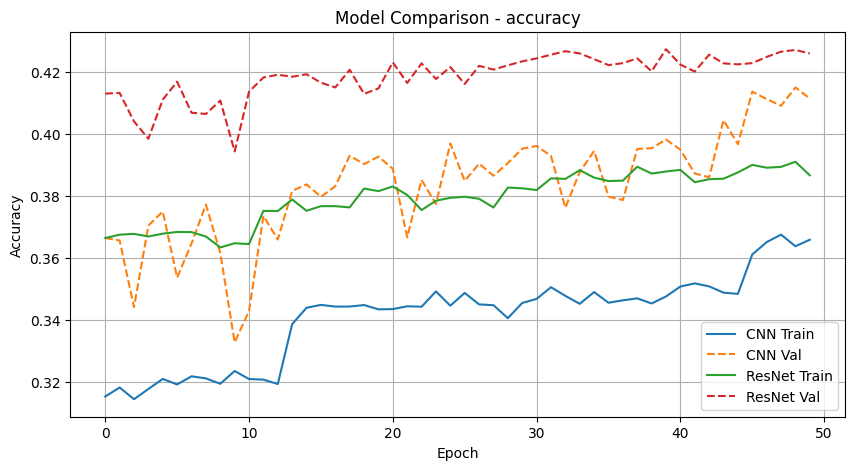

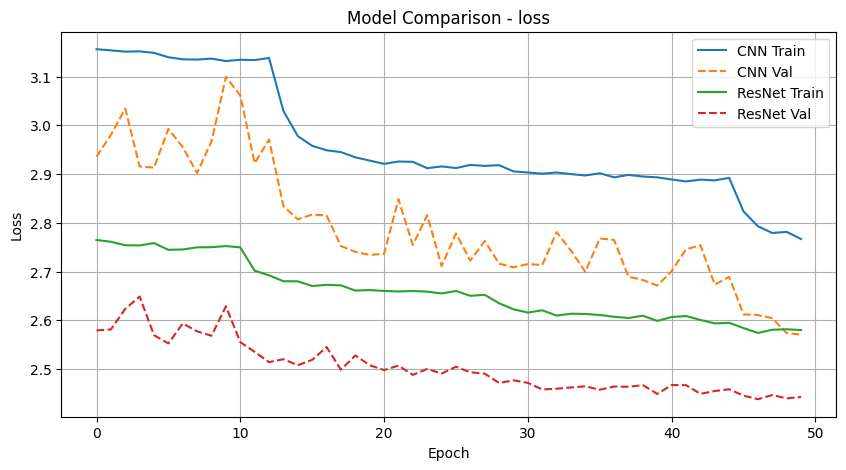

In [76]:
def plot_compare_histories(histories, names, metric='accuracy'):
    plt.figure(figsize=(10, 5))
    for history, name in zip(histories, names):
        plt.plot(history.history[metric], label=f'{name} Train')
        plt.plot(history.history['val_' + metric], linestyle='--', label=f'{name} Val')
    plt.title(f'Model Comparison - {metric}')
    plt.xlabel('Epoch')
    plt.ylabel(metric.title())
    plt.legend()
    plt.grid(True)
    plt.show()

# مقایسه دقت
plot_compare_histories([history, renet_history], ['CNN', 'ResNet'], metric='accuracy')

# مقایسه Loss
plot_compare_histories([history, renet_history], ['CNN', 'ResNet'], metric='loss')
